In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib

In [2]:
dataset = pd.read_csv('test.csv')
dataset.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [3]:
dataset.shape

(300, 2)

In [4]:
dataset.columns

Index(['x', 'y'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [6]:
dataset.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [7]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
X_train.shape

(210, 1)

In [10]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
print("b=",regressor.coef_)
print("a =",regressor.intercept_)

b= [1.01451766]
a = -0.44385239830579337


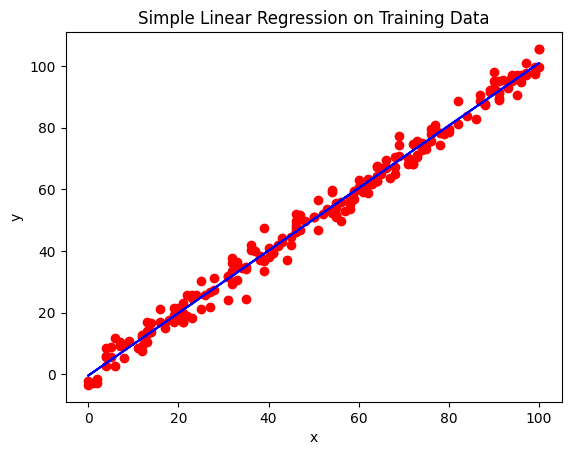

In [12]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
# regressor.predict(x_train)  because it is predicted salaries for x_train
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [13]:
y_pred = regressor.predict(X_test)

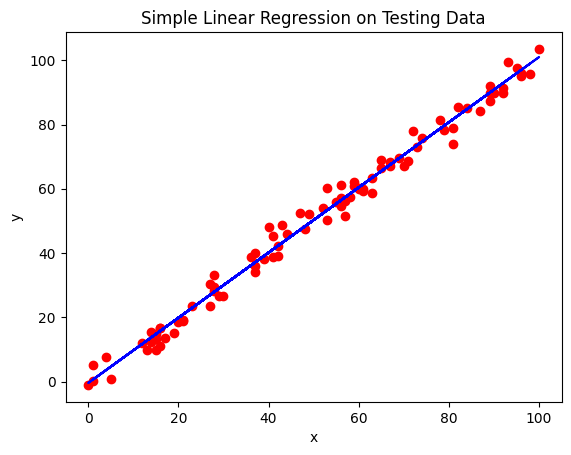

In [14]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
# y_pred  because it is predicted salaries for x_test
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:



Mean Squared Error (MSE) is the mean of the squared errors:



Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:



Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because you want to minimize them.

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.439805009290017
MSE: 9.211150107044473
RMSE: 3.0349876617614893


In [16]:
joblib.dump(regressor,'regressor_model.pkl')

['regressor_model.pkl']

In [17]:
model= joblib.load('regressor_model.pkl')

In [18]:
pred=model.predict([[77]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
pred

array([77.67400716])

In [20]:
model.predict([[21]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.86101839])